### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import scipy.stats as stats

In [2]:
df = pd.read_csv('../All Data_Sets/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_bill        244 non-null    float64
 1   tip               244 non-null    float64
 2   sex               244 non-null    object 
 3   smoker            244 non-null    object 
 4   day               244 non-null    object 
 5   time              244 non-null    object 
 6   size              244 non-null    int64  
 7   price_per_person  244 non-null    float64
 8   Payer Name        244 non-null    object 
 9   CC Number         244 non-null    int64  
 10  Payment ID        244 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 21.1+ KB


In [4]:
rd.seed(101)
object_cols1 = list(df.select_dtypes('object').columns)
object_cols2 = list(df.select_dtypes('object').columns)
rd.shuffle(object_cols2)
object_cols1

['sex', 'smoker', 'day', 'time', 'Payer Name', 'Payment ID']

In [5]:
def on_button_clicked(but):
    tab = pd.crosstab(df[a.value],df[b.value])
    print(tab)
    chi2,p,dof,expected = stats.chi2_contingency(tab)
    print('Chi-Square Value :',chi2)
    print('P Value :',p)
    print('Degrees Of Freedom :',dof)
#     print('Expected Values :\n',expected)
    print('Relation') if p <= 0.05 else print('No Relation')
    print('-'*75)

In [6]:
import ipywidgets as widgets


a = widgets.Dropdown(
    options=object_cols1,
    description='Column 1:',
    disabled=False,
)

b = widgets.Dropdown(
    options=object_cols2,
    description='Column 2:',
    disabled=False,
)

button = widgets.Button(description='Result',disabled=False,button_style='info',
    tooltip='Click me',icon='check')

display(a)
display(b)
display(button)
button.on_click(on_button_clicked)

Dropdown(description='Column 1:', options=('sex', 'smoker', 'day', 'time', 'Payer Name', 'Payment ID'), value=…

Dropdown(description='Column 2:', options=('time', 'sex', 'Payment ID', 'day', 'smoker', 'Payer Name'), value=…

Button(button_style='info', description='Result', icon='check', style=ButtonStyle(), tooltip='Click me')

time    Dinner  Lunch
sex                  
Female      52     35
Male       124     33
Chi-Square Value : 9.343808982970623
P Value : 0.002237400118075248
Degrees Of Freedom : 1
Relation
---------------------------------------------------------------------------
time    Dinner  Lunch
sex                  
Female      52     35
Male       124     33
Chi-Square Value : 9.343808982970623
P Value : 0.002237400118075248
Degrees Of Freedom : 1
Relation
---------------------------------------------------------------------------


In [8]:
p_values= []
chi2_values = []
labels = []

In [10]:
for i in object_cols1:
    for j in object_cols1:
        if i != j and f'{j}-{i}' not in labels:
            tab = pd.crosstab(df[i],df[j])
            chi2,p,dof,expected = stats.chi2_contingency(tab)
            chi2_values.append(chi2)
            p_values.append(p)
            labels.append(f'{i}-{j}')  

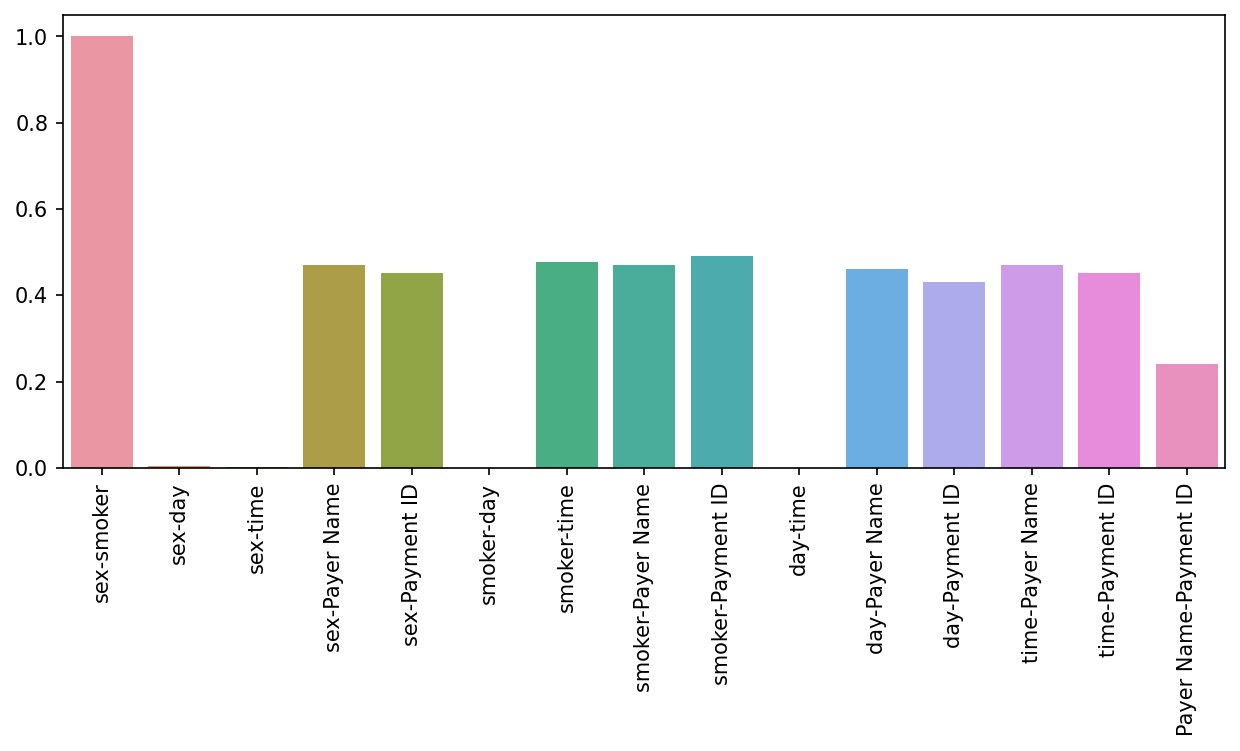

In [12]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(x=labels,y=p_values)
plt.xticks(rotation=90);

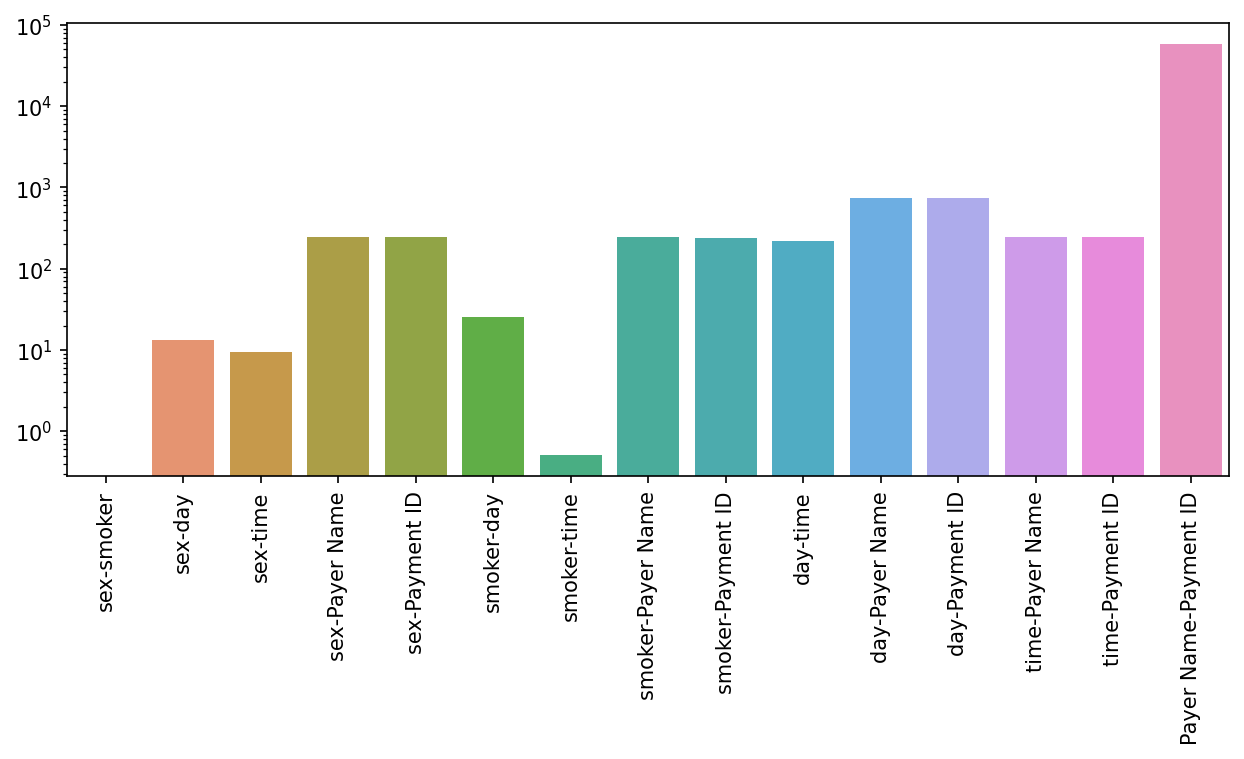

In [45]:
plt.figure(figsize=(10,4),dpi=150)
sns.barplot(x=labels,y=chi2_values,log=True)
plt.xticks(rotation=90);